used terminal command: file -i alt.atheism.txt

alt.atheism.txt: message/rfc822; charset=iso-8859-1

In [32]:
import pandas as pd
import numpy as np


with open('alt.atheism.txt','r', encoding='iso-8859-1') as file:
    lines=file.read().split('\n')
lines=[line for line in lines if line.strip()!='']
print(lines[:5])
ylabels=['0']*len(lines)
df=pd.DataFrame({'text':lines,'label':ylabels})
df.head()

['From: mathew <mathew@mantis.co.uk>', 'Subject: Alt.Atheism FAQ: Atheist Resources', 'Archive-name: atheism/resources', 'Alt-atheism-archive-name: resources', 'Last-modified: 11 December 1992']


,text,label
0,From: mathew <mathew@mantis.co.uk>,0
1,Subject: Alt.Atheism FAQ: Atheist Resources,0
2,Archive-name: atheism/resources,0
3,Alt-atheism-archive-name: resources,0
4,Last-modified: 11 December 1992,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
transformer=TfidfVectorizer()
data_after_tfidf=transformer.fit_transform(df['text'])
print(data_after_tfidf.shape)

(94405, 16046)


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=2,random_state=42)
data_after_svd=svd.fit_transform(data_after_tfidf)
print(data_after_svd.shape)


(94405, 2)


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

kmeans=KMeans(n_clusters=20,random_state=42)
kmeans.fit(data_after_svd)
ypredict=kmeans.predict(data_after_svd)

silhouette_score=silhouette_score(data_after_svd,ypredict)
print(silhouette_score)

0.5820530486308909


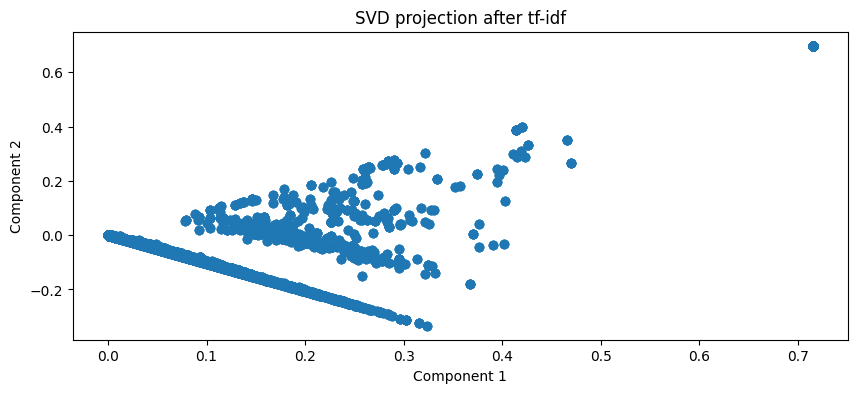

In [ ]:

plt.figure(figsize=(10,4))
plt.scatter(data_after_svd[:,0],data_after_svd[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVD projection after tf-idf')
plt.show()


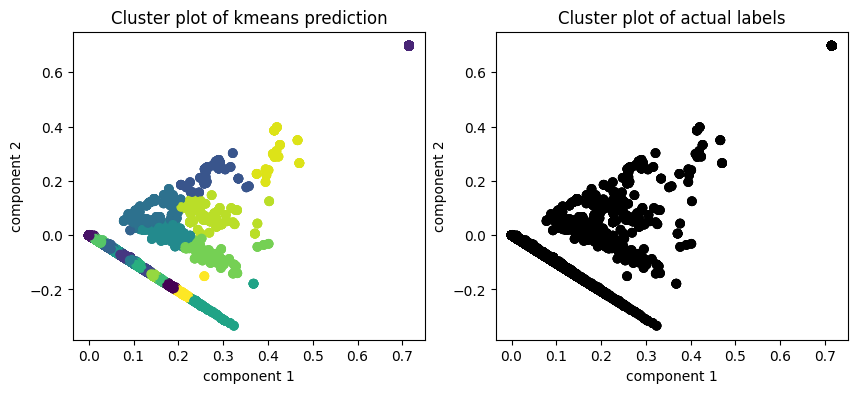

In [33]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
ax1.scatter(data_after_svd[:,0],data_after_svd[:,1],c=ypredict)
ax1.set_xlabel("component 1")
ax1.set_ylabel("component 2")
ax1.set_title("Cluster plot of kmeans prediction")

ax2.scatter(data_after_svd[:,0],data_after_svd[:,1],c=ylabels)
ax2.set_xlabel("component 1")
ax2.set_ylabel("component 2")
ax2.set_title("Cluster plot of actual labels")

plt.show()
